# Introduction to Probability & Statistics: III

*S. R. Taylor (2022)*

Material in this lecture and notebook is based upon the Basic Stats portion of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), the Introduction to Probability & Statistics portion of A. Connolly's & Ž. Ivezić's "Astrostatistics & Machine Learning" class at the University of Washington (ASTR 598, https://github.com/dirac-institute/uw-astr598-w18), and J. Bovy's mini-course on "Statistics & Inference in Astrophysics" at the University of Toronto (http://astro.utoronto.ca/~bovy/teaching.html). 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 3.

***Exercises required for class participation are in <font color='red'>red</font>.***

---

## Contents
* [Contral limit theorem](#one)
* [Bivariate and multivariate pdfs](#two)
* [Correlation coefficients](#three)
* [Sampling from arbitrary distributions](#four)

---

## Central Limit Theorem <a class="anchor" id="one"></a>

One of the reasons that a Gaussian (or Normal) Distribution is so common is because of the **Central Limit Theorem**:

> For an arbitrary distribution, $h(x)$, with a well-defined mean, $\mu$, and standard deviation, $\sigma$ (i.e. tails should fall off faster than $1/x^2$) the mean of $N$ values \{$x_i$\} drawn from the distribution will follow a Gaussian Distribution with $\mathcal{N}(\mu,\sigma/\sqrt{N})$. (A Cauchy distribution is one example where this fails.)

This theorem is the foundation for performing repeat measurements in order to improve the accuracy of one's experiment. This is truly amazing! No matter what distribution you start off with (provided it has a well defined mean and standard deviation) or the measurement process itself, repeated batches of $N$ draws will follow a Gaussian centered around the mean.  

The **Weak Law of Large Numbers** (aka **Bernoulli's Theorem**) further says that the sample mean will converge to the distribution mean as $N$ increases.

Let's wrap our heads around what this means with some examples. 

We'll first consider $h(x) = \mathcal{N}(\mu=0.5,\sigma=1/\sqrt{12})$. According to the Central Limit Theorem, taking the mean of many batches of $N$ random samples should result in a normal distribution with $\mathcal{N}(\mu=0.5,\sigma=1/\sqrt{12}/\sqrt{N})$.

In [1]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

<font color='red'>Complete and execute the following cell</font>

Text(0, 0.5, 'pdf')

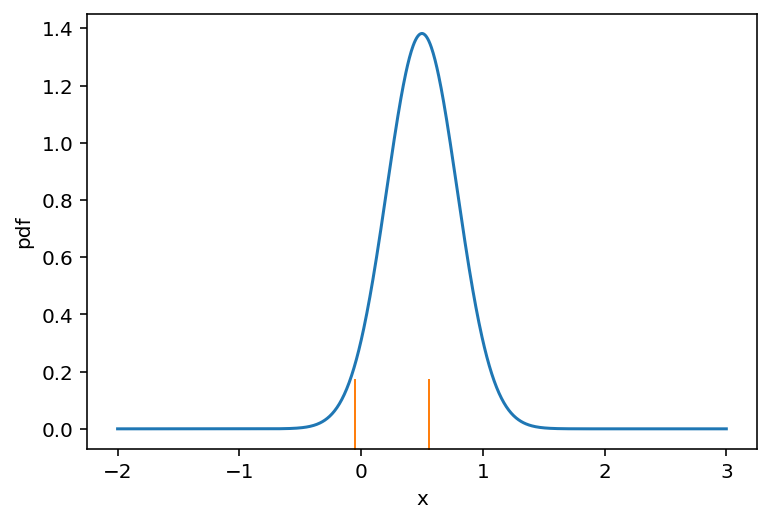

In [7]:
N = 2 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)

xgrid = np.linspace(-2,3,1000) # Array to sample the space 
distG = scipy.stats.norm(loc=mu,scale=sigma_h) # Complete
plt.plot(xgrid, distG.pdf(xgrid)) # Complete

x = np.random.normal(mu, sigma_h,2) # Two random draws
plt.plot(x, 0*x, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')

Now let's average those two draws and plot the result (in the same panel). Do it as a histogram for 100,000 batches of 2 samples each. Use a stepfilled histogram that is normalized with 50% transparency and 100 bins.

<font color='red'>Complete and execute the following cell</font>

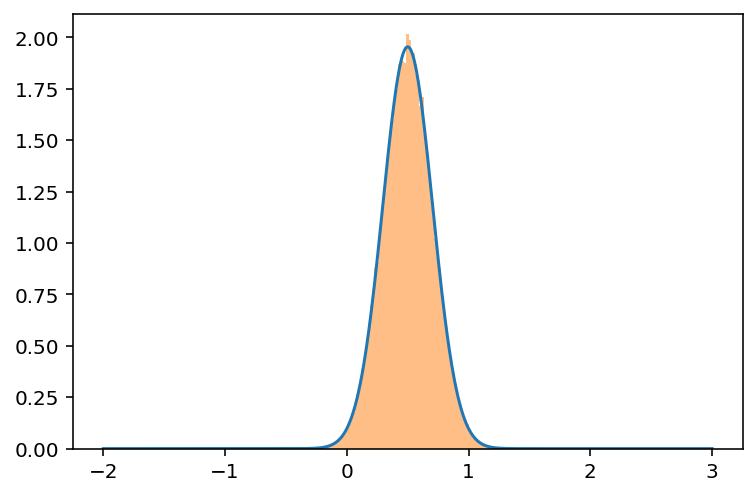

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 2 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)
sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution

xgrid = np.linspace(-2,3,1000) # Array to sample the space 

# plot the distribution of means according to central limit theorem
distG = scipy.stats.norm(mu, sigma_cl) # Complete
plt.plot(xgrid, distG.pdf(xgrid)) # Complete

# Add a histogram that is the mean of 100,000 batches of N draws
yy = []
for i in np.arange(100000):
    xx = np.random.normal(mu,sigma_h,N) # N random draws
    yy.append(np.average(xx)) # Append average of those random draws to the end of the array

_ = plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True)

Well that's great and all, but didn't I say this worked for arbitrary generating distributions $h(x)$ so long as their mean and standard deviations were well defined? Let's check this out for a uniform distribution with $\mu=0.5$ and width$ =1$, such that the standard deviation is $\sigma=1/\sqrt{12}$ (see *Lecture 3*).

<font color='red'>Complete the following cell</font>

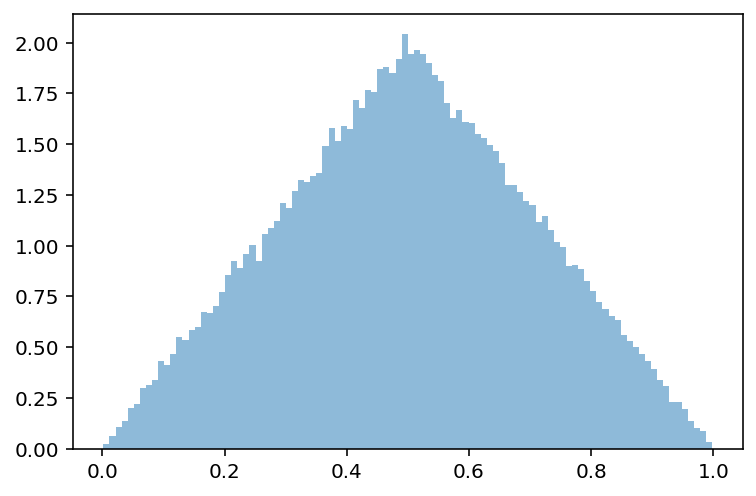

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 2 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)
sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution

# Complete the rest of this cell with a repetition of the the previous exercise,
# except drawing N-sample batches from a [0,1] uniform distribution, and plotting
# the distribution of the means of those batches. Show that the distribution
# matches that implied by the central limit theorem.

# Add a histogram that is the mean of 100,000 batches of N draws
yy = []
for i in np.arange(100000):
    xx = np.random.uniform(mu-0.5,mu+0.5,N) # N random draws
    yy.append(np.average(xx)) # Append average of those random draws to the end of the array

_ = plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True)

Now instead of averaging 2 draws, average 3.  Then do it for 10.  Then for 100.  Each time for 100,000 samples.


<font color='red'>Copy your code from above and edit accordingly (or just edit your code from above)</font>

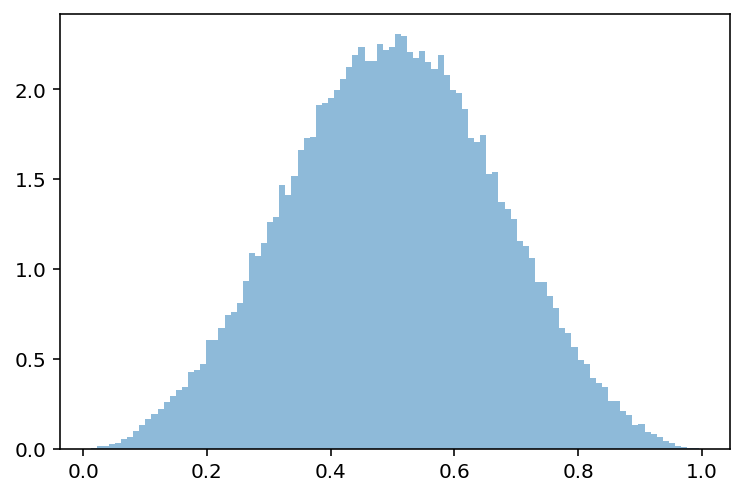

In [21]:
# Add a histogram that is the mean of 100,000 batches of N draws
N=3
yy = []
for i in np.arange(100000):
    xx = np.random.uniform(mu-0.5,mu+0.5,N) # N random draws
    yy.append(np.average(xx)) # Append average of those random draws to the end of the array

_ = plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True)

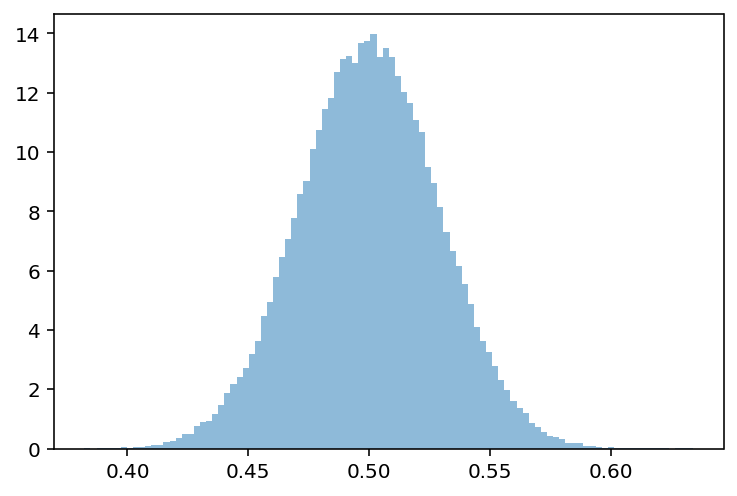

In [22]:
# Add a histogram that is the mean of 100,000 batches of N draws
N=100
yy = []
for i in np.arange(100000):
    xx = np.random.uniform(mu-0.5,mu+0.5,N) # N random draws
    yy.append(np.average(xx)) # Append average of those random draws to the end of the array

_ = plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True)

For 100 you will note that your draws are clearly sampling the full range, but the means of those draws are in a *much* more restrictred range. Moreover they are very closely following a Normal Distribution. 

/Users/gersbaka/opt/anaconda3/envs/astro8070/lib/python3.8/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


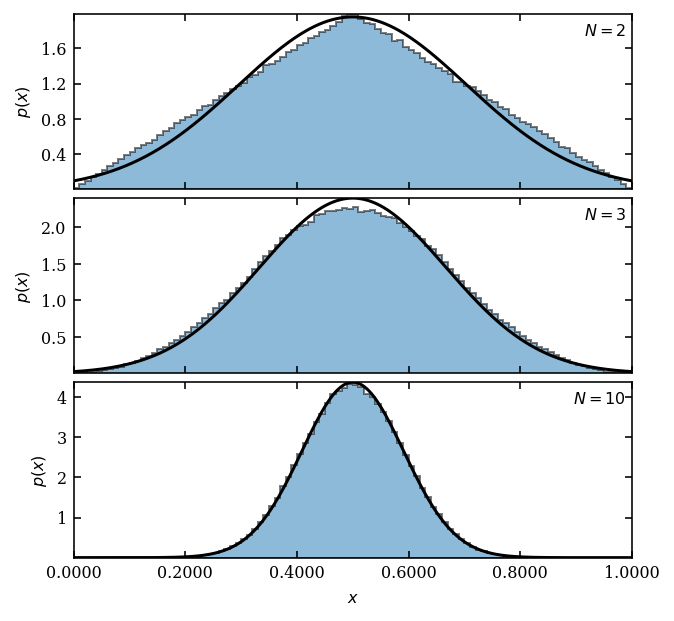

<Figure size 432x288 with 0 Axes>

In [23]:
# By the way, if your code is ugly, you can run the 
# following cell to reproduce Ivezic, *Figure 3.20* 
# which nicely illustrates this in one plot.
%run ./scripts/fig_central_limit.py

This is truly mind blowing, and a wonderful example of the power and generalizability of statistics in tackling the measured properties of arbitrary distributions. Even if you've never heard of or understood the Central Limit Theorem, you have been implicitly using it your entire career so far. 

If you are confused, then watch this video from the Khan Academy:
[https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem).

## Bivariate and Multivariate pdfs <a class="anchor" id="two"></a>

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the **(dimensionless) correlation coefficient**.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

**The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.**   

These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Ivezic, Figure 3.22):
![Ivezic, Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution. (Or in different terminology, the semi-minor and semi-major axes of the ellipse). These are called the **principal axes** and are given by

$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$

and

$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this (rotated) coordinate system are

$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that **the correlation vanishes in this coordinate system (by definition)** and the bivariate Gaussian is just a product of two univariate Gaussians.  

This concept will be crucial for understanding ***Principal Component Analysis*** when we get to Chapter 7, where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that **outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$**.  

Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Ivezic, Figure 3.23 for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

<font color='red'>For an example of how to generate a bivariate distribution and plot confidence contours, read through, understand, and execute the following cell.</font>

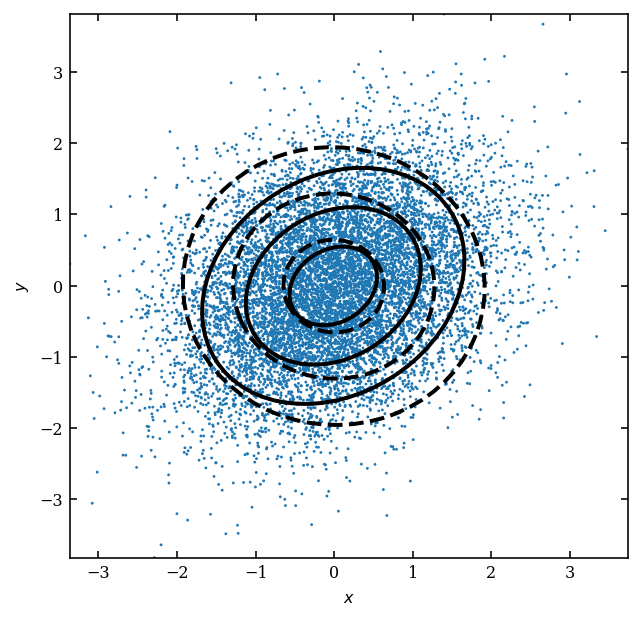

In [24]:
# Base code drawn from Ivezic, Figure 3.22, edited by G. Richards to simplify the example

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

# directional means
mux = 0
muy = 0

# directional standard deviations
sigx = 1.0
sigy = 1.0

# covariance
sigxy = 0.3

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = np.array([mux, muy])
cov = np.array([[sigx**2, sigxy], [sigxy, sigy**2]])
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#------------------------------------------------------------
# Add 2000 outliers drawn from a 5 times wider distribution
# with opposite covariance
xout, yout = np.random.multivariate_normal(mean, 
                                           5*cov*np.array([[1,-1],[-1,1]]), 
                                           2000).T

xt = np.append(x,xout)
yt = np.append(y,yout)

# Fit those data with a bivariate normal distribution
# Use robust and non-robust statistics estimates
mean_nr, sigma_x_nr, sigma_y_nr, alpha_nr = fit_bivariate_normal(xt, yt, robust=False)
mean_r, sigma_x_r, sigma_y_r, alpha_r = fit_bivariate_normal(xt, yt, robust=True)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean_nr, N * sigma_x_nr, N * sigma_y_nr, 
                         angle=alpha_nr * 180./np.pi, lw=2, 
                         ec='k', fc='none', ls='dashed'))
    ax.add_patch(Ellipse(mean_r, N * sigma_x_r, N * sigma_y_r, 
                         angle=alpha_r * 180./np.pi, lw=2, 
                         ec='k', fc='none'))
    
ax.set_xlabel('$x$');
ax.set_ylabel('$y$');

The non-robust estimates (***dashed lines***) give biased sigma ellipses due to the outliers. The robust estimates (***solid lines***) do much better.

We can generalize the way we describe **Gaussian distributions in multiple dimensions**, $M$, through the elegance of linear algebra. Instead of writing everything in terms of separate coordinates, we can bundle everything together in an $M$-dimensional coordinate vector $\vec{x}$, mean vector $\vec{\mu}$, and covariance matrix $\mathbf{C} = E([\vec{x}-\vec{\mu}][\vec{x}-\vec{\mu}]^T)$.

$$p(\vec{x}|\vec{\mu},\mathbf{C}) = \frac{1}{\sqrt{\mathrm{det}(2\pi\mathbf{C})}} \exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) \right] $$

where 

$$ C_{kj} = \int_{-\infty}^\infty (x^k-\mu^k)(x^j-\mu^j)p(\vec{x}|\vec{\mu},\mathbf{C})\,d^M x $$

and 

$$ (\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) = \sum_{k=1}^M \sum_{j=1}^M [\mathbf{C}^{-1}]_{kj}(x^k-\mu^k)(x^j-\mu^j) $$

### Gaussian confidence levels in 2 dimensions

This discussion is inspired by Dan Foreman-Mackey's discussion in the context of the [corner](https://corner.readthedocs.io/en/latest/) software package: https://corner.readthedocs.io/en/latest/pages/sigmas.html 

In two dimensions, a Gaussian density can be described by

$$ \mathrm{pdf}(r) = \frac{1}{2\pi s^2}\exp\left[-\frac{1}{2}\left(\frac{r}{s}\right)^2\right] $$

with the cdf (using polar coordinates and implicitly integrating out the angle)

$$ \mathrm{cdf}(x) = 1 - \exp(-(x/s)^2/2) $$

This means that within "1-sigma", the Gaussian contains 1-exp(-0.5) $\sim 0.393$ or $39.3\%$ of the volume. Therefore in `corner`, the relevant 1-sigma levels for a 2D histogram of samples is 39% not 68%. 

If you are using `corner` and want the usual 68% of the "sample mass" definition of sigma, use the `levels` keyword argument when you call `corner.corner`.

<font color='red'>Try both options below</font>

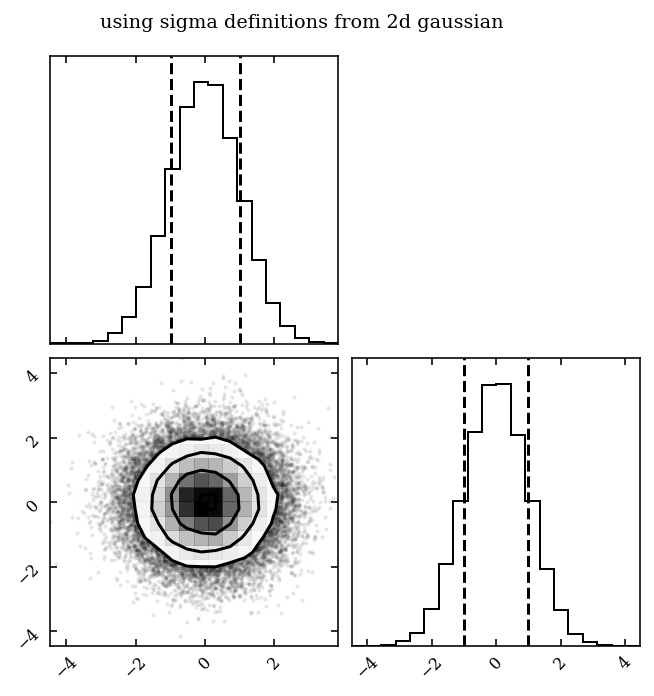

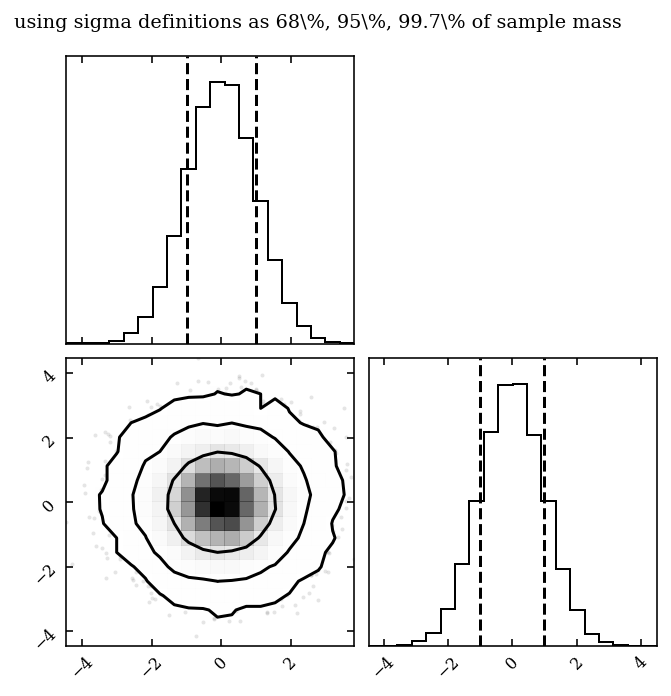

In [27]:
import corner

# Generate some fake data from a Gaussian
np.random.seed(42)
x = np.random.randn(50000, 2)

# formally correct sigma definition
fig = corner.corner(x, quantiles=(0.16, 0.84), )
fig.suptitle("using sigma definitions from 2d gaussian");

# standard sample mass definition
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(0.68,0.95,0.997))
fig.suptitle("using sigma definitions as 68\%, 95\%, 99.7\% of sample mass");

## Correlation coefficients <a class="anchor" id="three"></a>

We'd like to be able to quantify how well two samples of data are correlated with one another. Always remember though: 

> Post hoc, ergo propter hoc.

Correlation does not imply causation...although it is sometimes correlated with it :-)

### Pearson's coefficient

Given two length-$N$ samples of data $\{x_i\}$ and $\{y_i\}$, Pearson's correlation coefficient is defined as

$$ r = \frac{\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N (x_i-\bar{x})^2}\sqrt{\sum_{i=1}^N (y_i-\bar{y})^2}} $$

where $-1\leq r\leq 1$, and $r=0$ for uncorrelated variables.

If the pairs $(x_i,y_i)$ are drawn from uncorrelated univariate Gaussian distributions, then the distribution of $r$ follows a Student's $t$ distribution with $k=N-2$ degrees of freedom and $t = r\sqrt{(N-2)/(1-r^2)}$.

With this known "null hypothesis" distribution, a measured $r$ can be interpreted in terms of the significance with which we can reject the variables being correlated, e.g., if $N=10$ then the probability that a value of $r\geq 0.72$ arises just by chance noise fluctuations is $1\%$. 

There are two big problems with Pearson's coefficient though:
- It does not incorporate measurement uncertainties on the data.
- It is highly susceptible to outliers.

### Spearman's coefficient

Similar definition to Pearson's, with sample values replaced by their cumulative ranks. As we've seen, cumulative statistics based on rank are more robust estimators than ones that use the actual sample values. The samples in each dataset are ranked from $1,\ldots,N$ in ascending order, with the largest value given the rank $N$. 

$$ r_S = \frac{\sum_{i=1}^N (R^x_i-\bar{R^x})(R^y_i-\bar{R^y})}{\sqrt{\sum_{i=1}^N (R^x_i-\bar{R^x})^2}\sqrt{\sum_{i=1}^N (R^y_i-\bar{R^y})^2}}. $$

The distribution of $r_S$ is the same as for Pearson's, except in the definition of the test statsitic $t$, $r$ is replaced by $r_S$.

### Kendall's coefficient

Kendall's coefficient uses the sample ranks, but does not take rank differences like in Spearman's coefficient. Instead, we compare the relative number of *concordant* and *discordant* pairs. 

**Concordant pairs** are where the differences in values between a pair of samples $j$ and $k$ have the same sign in $x$ and $y$, i.e., $(x_j-x_k)(y_j-y_k)>0$.

**Discordant pairs** are where the differences in values between a pair of samples $j$ and $k$ have the different signs in $x$ and $y$, i.e., $(x_j-x_k)(y_j-y_k)<0$.

*For perfectly correlated data, all $N(N-1)/2$ sample pairs will be concordant. For perfectly anti-correlated data, all pairs will be discordant.* 

Kendall's $\tau$ is then computed as

$$ \tau = 2\frac{N_c-N_d}{N(N-1)}.$$

In the following example that reproduces *Ivezic Fig. 3.24*, samples of $x$ and $y$ from a bivariate normal distribution with/without outlier contamination are assessed for correlation using each of the above. It is clear that Pearson's suffers considerably from outliers, while the rank-based coefficients are more resilient. 

@pickle_results: computing results and saving to 'fig_correlations_dump.pkl'


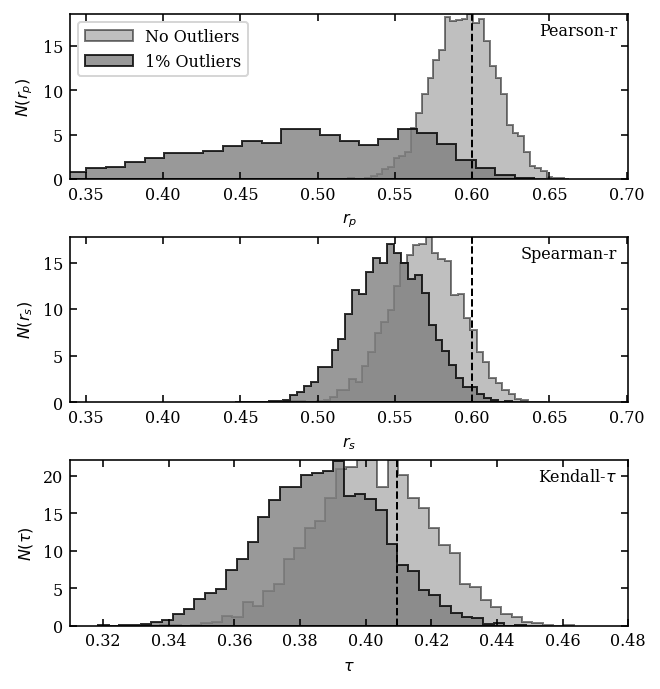

<Figure size 432x288 with 0 Axes>

In [28]:
%run ./scripts/fig_correlations.py

## Sampling from arbitrary distributions <a class="anchor" id="four"></a>

Numerical simulations of the measurment process are often the only practical way to assess the complicated influences of selection effects, biases, and other processing stages of data taking. Such approaches are often called **Monte Carlo simulations**, producing **Monte Carlo or mock samples**. It is often highly beneficial to resample from arbitrary distributions in order to simulate further measurements.

Imagine you've got an arbitrary distribution $h(x)$ in analytic or histogram form (or alternatively just samples from it). How do you make more samples if it's not one of the standard distributions in `numpy` or `scipy`? We'll discuss the 1D case here in two ways. **Rejection sampling** (less preferred) and **Inverse transform sampling** (highly preferred and easy).

Let's generate some data using the mix of Cauchy distributions that we've employed several times.

In [29]:
# Execute this cell
#------------------------------------------------------------
# Let's generate some data: a mix of several Cauchy distributions
random_state = np.random.RandomState(seed=0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * scipy.stats.cauchy(mu, gamma).pdf(x)
                    for (mu, gamma, f) in mu_gamma_f])
data = np.concatenate([scipy.stats.cauchy(mu, gamma).rvs(int(f * N), 
                                                         random_state=random_state)
                       for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(x)
data = data[data > -10]
data = data[data < 30]

<font color='red'>Make a numpy histogram object out of the data with `density=True` and `bins=50`. This will return a tuple of bin heights and bin edges.</font>

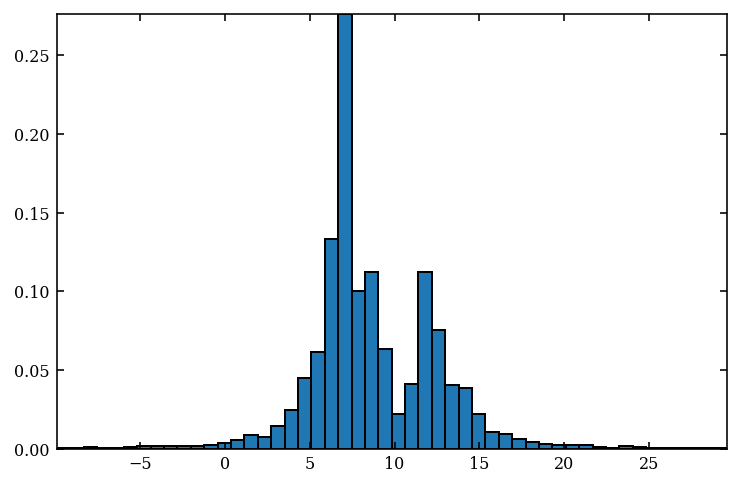

In [31]:
h = plt.hist(data,bins=50,density=True)
plt.show()

### Rejection sampling

The process for sampling from an arbitrary distribution with rejection is:

1) Decide on a straightforward *proposal distribution* $q(x)$ to propose new samples. It should be wide enough to capture the tails of $h(x)$. We'll use a uniform distribution here.

2) Generate a random sample from $q(x)$, $x_i$.

3) Now generate a random sample, $u$, from a uniform distribution in the range $[0,\mathrm{max}(h(x))]$, where the upper bound should be as large or larger than the maximum density of $h(x)$. (This could be worked out analytically or by histograming the data.)

4) If $u\leq h(x_i)$ accept the point, or else reject it and try again from step 2.


This is shown pictorally here (image reproduced by [Robert Collins class CSE586 "Computer Vision II" at PSU](http://www.cse.psu.edu/~rtc12/CSE586/))

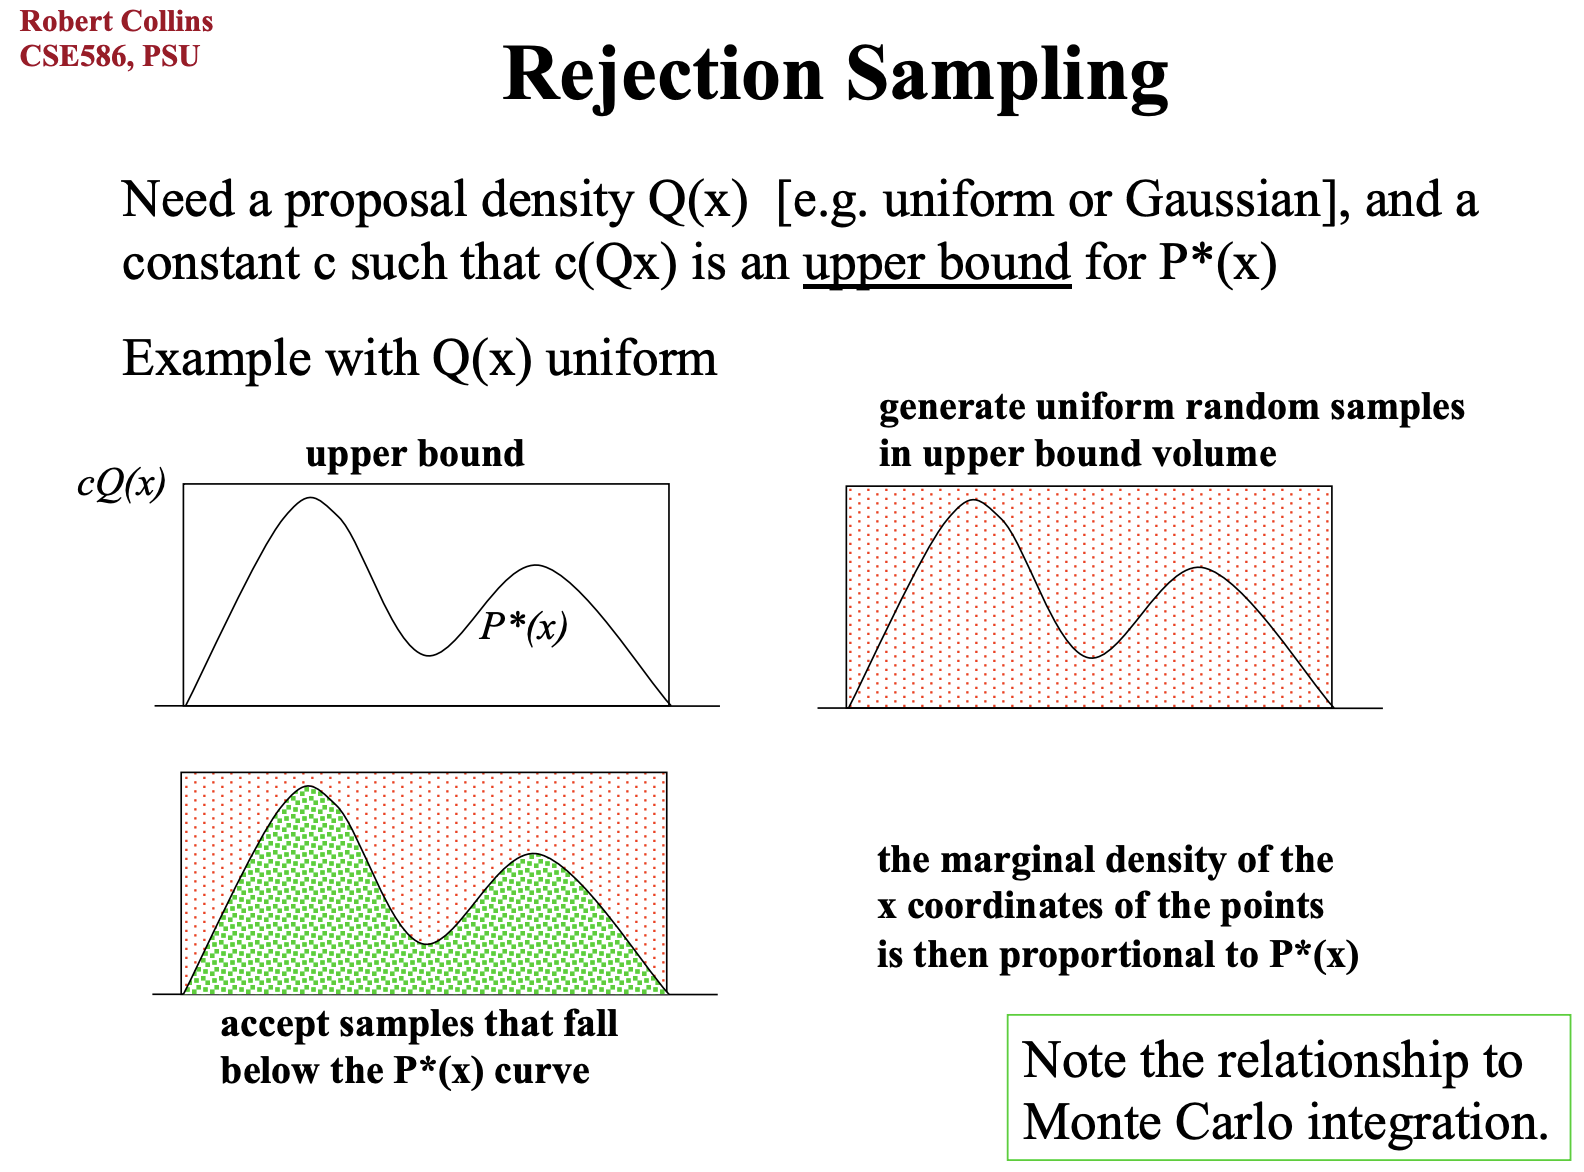

Let's try this for a simple Gaussian.

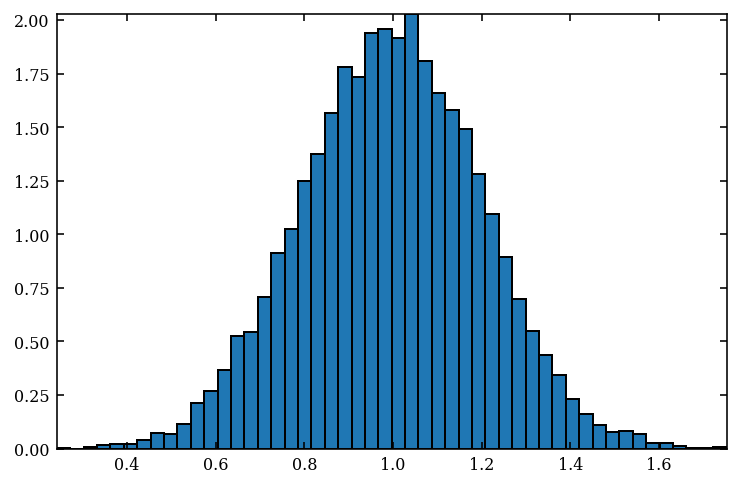

In [32]:
# Execute this cell

# make some sample data
sample_data = np.random.normal(1.0,0.2,10000)

# make a simple histogram object
counts, bins = np.histogram(sample_data, bins=50, density=True)
maxh = counts.max() # find the maximum

# Make a scipy.stats random variable object from a histogram
# This is a great hack!
disth = scipy.stats.rv_histogram((counts,bins))

N = 100000 # trials
q = np.random.uniform(0.0, 2.0, N) # proposed points
u = np.random.uniform(0, maxh, N) # uniform draws

mask = u<=disth.pdf(q) # assess whether u <= q(x_i) in the smart pythonic way

monte_carlo = q[mask] # reject all points that don't pass, using masking

plt.hist(monte_carlo, bins=50, density=True);

...of course once you have the `disth` you can immediately draw from the pdf using `disth.rvs()`. This is worth knowing for your own research. It's a great hack, but it's important to know the theory behind all this.

<font color='red'>Use this process to generate at least $1000$ new samples of the Cauchy-mix (i.e. the `data` sample), and make a plot that shows histograms of the original data and the new Monte Carlo samples to compare.</font>

4652


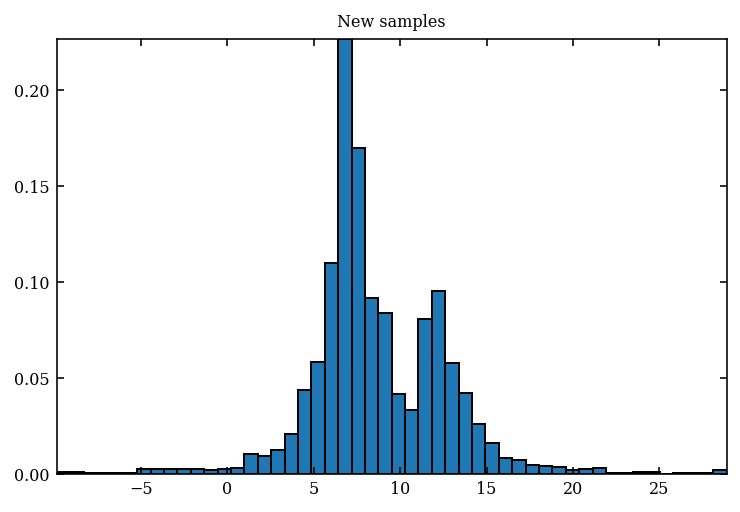

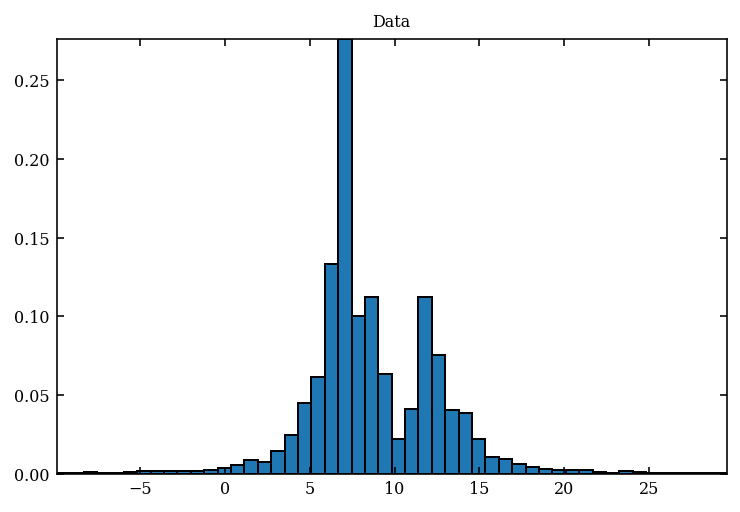

In [48]:
counts, bins = np.histogram(data,bins=50,density=True)
maxh = counts.max()

disth = scipy.stats.rv_histogram((counts,bins))

#Generate random points
N = 50000
u = np.random.uniform(min(data),max(data),size=N)
q = np.random.uniform(0,maxh,size=N)

qmask = q <= disth.pdf(u)

mc = u[qmask]
print(len(mc))
plt.hist(mc,bins=50,density=True)
plt.title('New samples')
plt.show()
plt.hist(data,bins=50,density=True)
plt.title('Data')
plt.show()

### Inverse transform sampling

Rejection sampling works, but wouldn't it be awesome if we didn't have to discard *any* points during our sampling? This is the power and simplicity of **inverse transform sampling**. The process is exceedingly simple. 

1) To sample from an arbitrary $h(x)$, you will also need the cdf $H(x)$ and its inverse, the quantile function $H^{-1}(x)$. If $h(x)$ is difficult to integrate, or $H(x)$ is difficult to invert to get the quantile function, then you could use numerical techniques to interpolate or produce lookup tables.

2) Generate a random sample $u$ from a uniform random distribution $[0,1]$. 

3) Using the quantile function $H^{-1}(x)$, find the value of $x$ below which a fraction $u$ of the distribution is contained. 

4) The $x$ value you get is a random sample from $h(x)$. Easy, right?

Let's try with the Gaussian again.

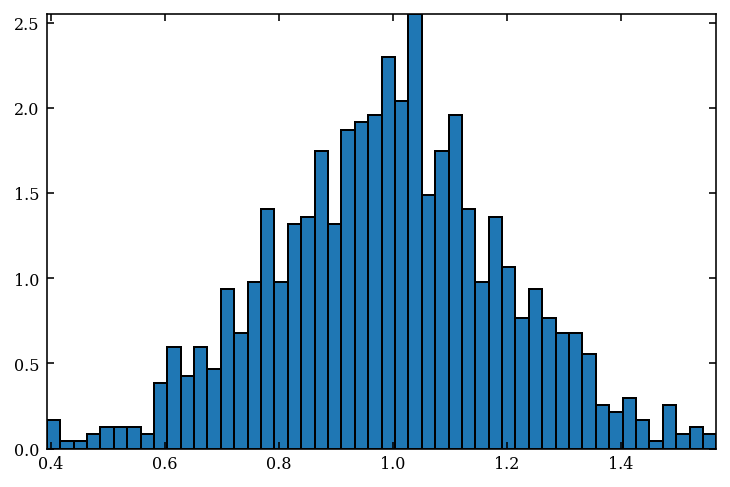

In [49]:
# Execute this cell

# make some sample data
sample_data = np.random.normal(1.0,0.2,10000)

# make a simple histogram object
counts, bins = np.histogram(sample_data, bins=50, density=True)
bin_mids = (bins[1:] + bins[:-1]) / 2 # mid location of bins
 
simple_cdf = np.cumsum(counts) / np.sum(counts) # very simply cumulative sum

# set up an interpolation of the inverse cumulative distribution
tck = scipy.interpolate.interp1d(simple_cdf, bin_mids)

# sample evenly along the cumulative distribution, and interpolate
# little hack to make sure no points are generated outside interpolation range.
# not ideal
u = np.random.uniform(0.001, 0.999, 1000) 
x_sample = tck(u)

plt.hist(x_sample, bins=50, density=True);

<font color='red'>Use this process to generate exactly $1000$ new samples of the Cauchy-mix (i.e. the `data` sample), and make a plot that shows histograms of the original data and the new Monte Carlo samples to compare.</font>

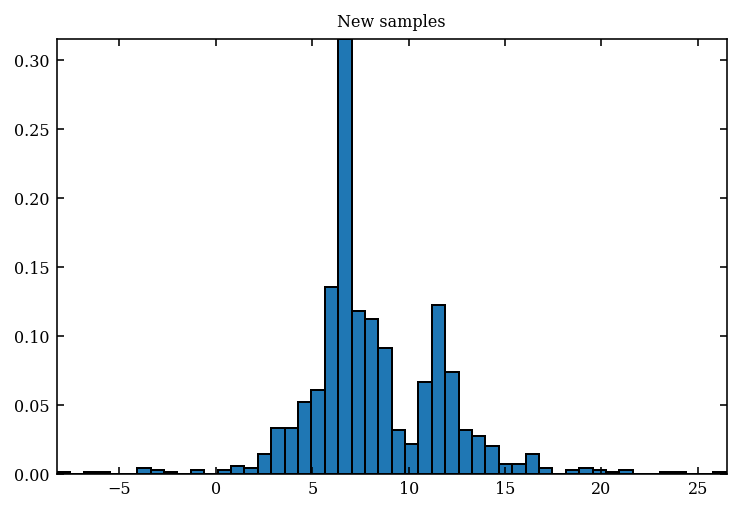

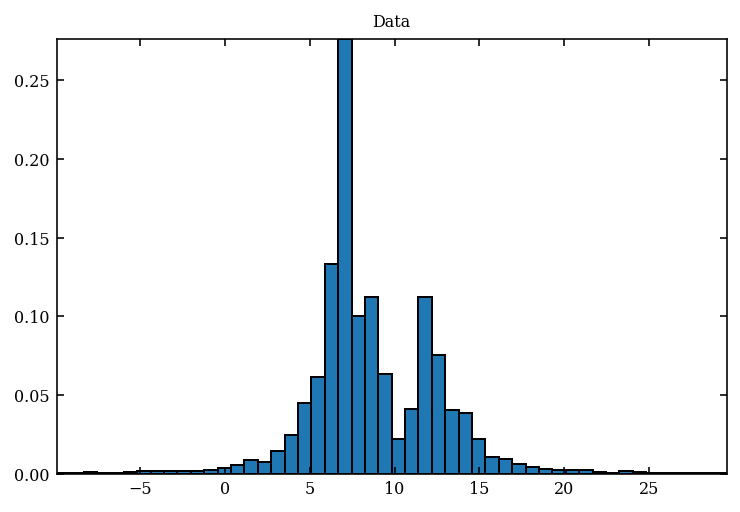

In [52]:
counts, bins = np.histogram(data, bins=50,density=True)
bin_mids = (bins[1:] + bins[:-1]) / 2

cdf = np.cumsum(counts)/np.sum(counts)
tck = scipy.interpolate.interp1d(cdf, bin_mids)

u = np.random.uniform(0.001, 0.999, 1000) 
x_sample = tck(u)

plt.hist(x_sample,bins=50,density=True)
plt.title('New samples')
plt.show()
plt.hist(data,bins=50,density=True)
plt.title('Data')
plt.show()

Run the script below and then load up the code in the cell after to see how easily `AstroML` let's you do all this.

/Users/gersbaka/Documents/Homework/Astro8070/astr_8070_s22/coursework/student_folders/kyle_gersbach/lectures/scripts/fig_clone_distribution.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x = np.hstack((d.rvs(int(f * Ndata)) for d, f in zip(dists, fracs)))


KS test: D = 0.0028; p = 1


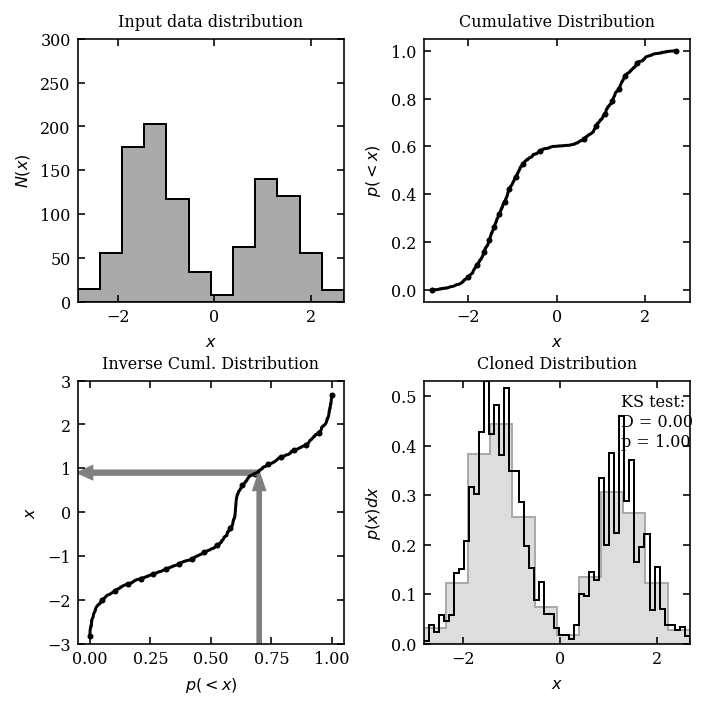

<Figure size 432x288 with 0 Axes>

In [53]:
%run ./scripts/fig_clone_distribution.py

/var/folders/bb/_0rqpxpd2cl3kcsqv4vkt18h0000gq/T/ipykernel_18243/2244084811.py:57: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x = np.hstack((d.rvs(int(f * Ndata)) for d, f in zip(dists, fracs)))


KS test: D = 0.0028; p = 1


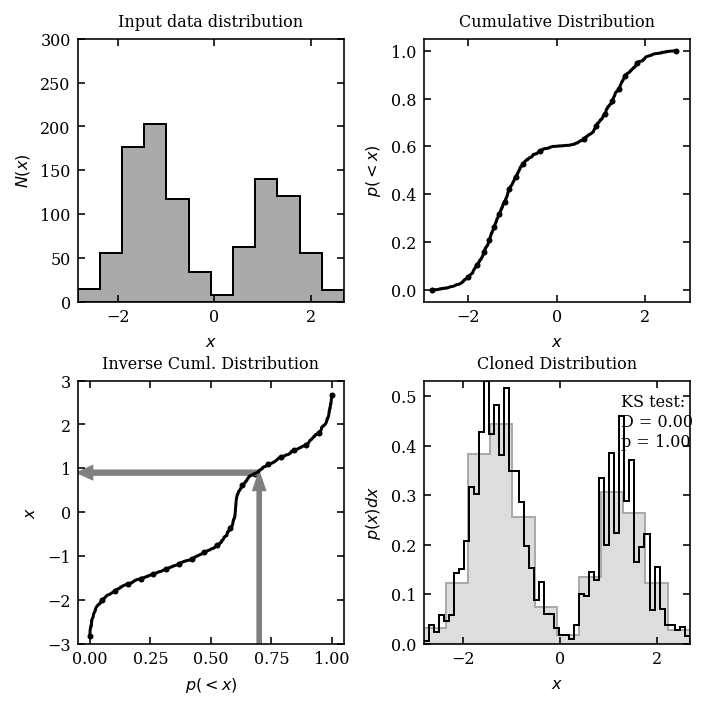

In [55]:
# %load ./scripts/fig_clone_distribution.py
r"""
Random Values from an Empirical Distribution
--------------------------------------------
Figure 3.25.

A demonstration of how to empirically clone a distribution, using a spline
interpolation to approximate the inverse of the observed cumulative
distribution. This allows us to nonparametrically select new random samples
approximating an observed distribution. First the list of points is sorted,
and the rank of each point is used to approximate the cumulative distribution
(upper right). Flipping the axes gives the inverse cumulative distribution on
a regular grid (lower left). After performing a cubic spline fit to the inverse
distribution, a uniformly sampled x value maps to a y value which approximates
the observed pdf. The lower-right panel shows the result. The K-S test
(see section 4.7.2) indicates that the samples are consistent with being
drawn from the same distribution. This method, while fast and effective,
cannot be easily extended to multiple dimensions.

This example uses the routine
:class:`astroML.density_estimation.EmpiricalDistribution`
to clone the distribution
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Create a distribution and clone it
Ndata = 1000
Nclone = 100000
np.random.seed(0)

# generate an 'observed' bimodal distribution with 10000 values
dists = (stats.norm(-1.3, 0.5), stats.norm(1.3, 0.5))
fracs = (0.6, 0.4)
x = np.hstack((d.rvs(int(f * Ndata)) for d, f in zip(dists, fracs)))

# We can clone the distribution easily with this function
x_cloned = EmpiricalDistribution(x).rvs(Nclone)

# compute the KS test to check if they're the same
D, p = stats.ks_2samp(x, x_cloned)
print("KS test: D = %.2g; p = %.2g" % (D, p))

#------------------------------------------------------------
# For the sake of this example, we need to calculate some
#  of the partial steps used by EmpiricalDistribution

# create a cumulative distribution
x.sort()
Px_cuml = np.linspace(0, 1, Ndata)

# set up an interpolation of the inverse cumulative distribution
tck = interpolate.splrep(Px_cuml, x)

# sample evenly along the cumulative distribution, and interpolate
Px_cuml_sample = np.linspace(0, 1, 10 * Ndata)
x_sample = interpolate.splev(Px_cuml_sample, tck)

#------------------------------------------------------------
# Plot the cloned distribution and the procedure for obtaining it
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.3, left=0.1, right=0.95,
                    bottom=0.08, top=0.92, wspace=0.3)

indices = np.linspace(0, Ndata - 1, 20).astype(int)

# plot a histogram of the input
ax = fig.add_subplot(221)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_ylim(0, 300)
ax.set_title('Input data distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$N(x)$')

# plot the cumulative distribution
ax = fig.add_subplot(222)
ax.scatter(x[indices], Px_cuml[indices], lw=0, c='k', s=9)
ax.plot(x, Px_cuml, '-k')
ax.set_xlim(-3, 3)
ax.set_ylim(-0.05, 1.05)
ax.set_title('Cumulative Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(<x)$')

# plot the inverse cumulative distribution and spline fit
ax = fig.add_subplot(223)
ax.scatter(Px_cuml[indices], x[indices], lw=0, c='k', s=9)
ax.plot(Px_cuml_sample, x_sample, '-k')
ax.arrow(0.7, -3, 0, 3.5, width=0.015, fc='gray', ec='gray',
         head_width=0.05, head_length=0.4)
ax.arrow(0.7, 0.9, -0.69, 0, width=0.1, fc='gray', ec='gray',
         head_width=0.3, head_length=0.06)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-3, 3)
ax.set_title('Inverse Cuml. Distribution')
ax.set_xlabel('$p(<x)$')
ax.set_ylabel('$x$')

# plot the resulting cloned distribution
ax = fig.add_subplot(224)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', density=True,
     ec='#AAAAAA', fc='#DDDDDD',
     label='input data')
hist(x_cloned, bins='knuth', ax=ax,
     histtype='step', density=True,
     color='k', label='cloned data')
ax.set_title('Cloned Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)dx$')
ax.text(0.74, 0.95, "KS test:\nD = %.2f\np = %.2f" % (D, p),
        ha='left', va='top', transform=ax.transAxes)

plt.show()
